In [21]:
data = open('train_day_7.csv')

data1 = open('train_day_71.csv','w')

k=0
for line in data:
    #print(line)
    data1.write(line)
    k +=1
    '''lin = line.split(',')
    for i in lin:
        data1.write(i+',')
    k=k+1'''
    if k ==1000000:
        break
    
data1.close()
data.close()
print(k)

1000000


In [22]:
data = open('train_day_71.csv')
str1 = ' '
dic = {}
for line in data:
    c = line.split(',')
    c1 = c[11].split('\n')
    #print(c1)
    if c[7] == '1':
        k = str1.join(c[0:2])
        if k in dic:
            dic[k] = dic[k] +1
        else:
            dd = {k:1}
            dic.update(dd)
data.close()

f = open('download_time.txt','w')
for i in dic:
    f.write(i+' '+str(dic[i])+'\n')
    #print(i)
f.close()

            

data = open('train_day_71.csv')
str2 = ' '
dic2 = {}
for line1 in data:
    c1 = line1.split(',')
    k1 = str1.join(c1[0:2])
    #print(c)
    if k1 in dic2:
        dic2[k1] = dic2[k1] +1
    else:
        dd1 = {k1:1}
        dic2.update(dd1)
data.close()

f = open('click_count.txt','w')
for i1 in dic2:
    f.write(i1+' '+str(dic2[i1])+'\n')
    #print(i)  
f.close()



In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import time

## user-app click network

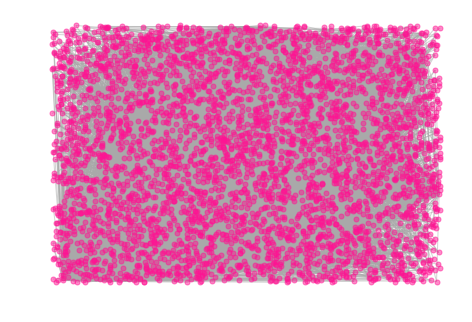

In [4]:
start = time.time()     
G = nx.Graph()
data = open('click_count.txt')
node1 = []
node2 = []

for line in data:
    data_num = line.split(' ')
    value = float(data_num[2].split('\n')[0])
    G.add_node(data_num[0])
    node1.append(data_num[0])  
    G.add_node(data_num[1])
    node2.append(data_num[1]) 
    G.add_weighted_edges_from([(data_num[0],data_num[1],value)])
data.close()


nx.draw(G,pos = nx.random_layout(G),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()

In [5]:
nx.write_gexf(G,"Binaryn_etwork.gexf") 

## Full projection

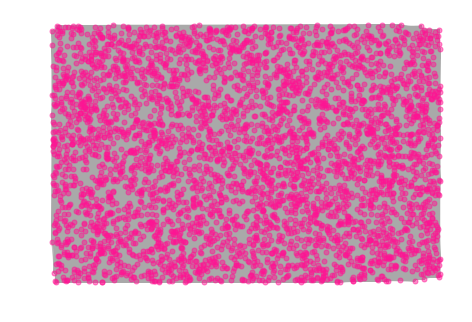

In [6]:
nodes = G.node()  

un_weight_G = nx.project(G,nodes)     

nx.draw(un_weight_G,pos = nx.random_layout(un_weight_G),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()

#plt.savefig('coun_unweight_fig.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

un_weight_degree = nx.degree(un_weight_G)              #degree
un_weight_part = community.best_partition(un_weight_G) 
un_weight_clus = nx.clustering(un_weight_G)            
un_weight_cent = nx.degree_centrality(un_weight_G)     #Compute the degree centrality for nodes.

In [10]:
nx.write_gexf(un_weight_G,"all_network.gexf") 

## IP one node projection

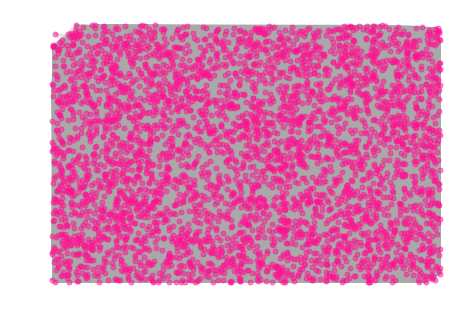

In [11]:
orin_data = open('train_day_71.csv')  
un_processed_data = open('click_unweighted_count.csv','w')  
for line1 in orin_data:
    un_orin_num = line1.split(',')
    un_proce_num = un_orin_num[0:11]
    un_proce_num.append(un_orin_num[11].split('\n')[0])
    
    if un_proce_num[0] in un_weight_part:
        un_proce_num.append(str(un_weight_degree[un_proce_num[0]]))
        un_proce_num.append(str(un_weight_part[un_proce_num[0]]))
        un_proce_num.append(str(un_weight_cent[un_proce_num[0]]))
        
        for k in un_proce_num:
            un_processed_data.write(str(k)+',') 
        un_processed_data.write('\n')
        
un_processed_data.close()
orin_data.close()


weight_ip = nx.project(G,node1)       
nx.draw(weight_ip,pos = nx.random_layout(weight_ip),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()

#plt.savefig('coun_weight_ip.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

weight_degree_ip = nx.degree(weight_ip)              #degree
weight_part_ip = community.best_partition(weight_ip) 
weight_clus_ip = nx.clustering(weight_ip)            
weight_cent_ip = nx.degree_centrality(weight_ip)     #Compute the degree centrality for nodes.

In [12]:
nx.write_gexf(weight_ip,"click_ip_projection.gexf") 

## app one node projection

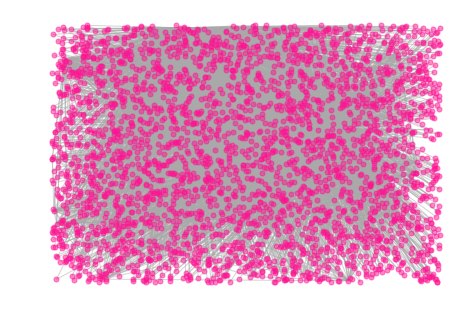

In [13]:
orin_data_ip = open('train_day_71.csv')  
processed_data_ip = open('click_weighted_count_ip.csv','w')  
for line2 in orin_data_ip:
    orin_num_ip = line2.split(',')
    proce_num_ip = orin_num_ip[0:11]
    proce_num_ip.append(orin_num_ip[11].split('\n')[0])
    
    if proce_num_ip[0] in weight_part_ip:
        proce_num_ip.append(str(weight_degree_ip[proce_num_ip[0]]))
        proce_num_ip.append(str(weight_part_ip[proce_num_ip[0]]))
        proce_num_ip.append(str(weight_cent_ip[proce_num_ip[0]]))
        
        for k1 in proce_num_ip:
            processed_data_ip.write(str(k1)+',') 
        processed_data_ip.write('\n')
        
processed_data_ip.close()
orin_data_ip.close()


weight_app = nx.project(G,node2)     
nx.draw(weight_app,pos = nx.random_layout(weight_app),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()

#plt.savefig('coun_weight_app.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

weight_degree_app = nx.degree(weight_app)              #degree
weight_part_app = community.best_partition(weight_app) 
weight_clus_app = nx.clustering(weight_app)            
weight_cent_app = nx.degree_centrality(weight_app)     #Compute the degree centrality for nodes.


In [14]:
nx.write_gexf(weight_app,"click_app_projection.gexf") 

In [15]:
orin_data_app = open('train_day_71.csv')  #打开原始csv
processed_data_app = open('click_weighted_count_app.csv','w')  #写入文件
for line2 in orin_data_app:
    orin_num_app = line2.split(',')
    proce_num_app = orin_num_app[0:11]
    proce_num_app.append(orin_num_app[11].split('\n')[0])
    
    if proce_num_app[0] in weight_part_app:
        proce_num_app.append(str(weight_degree_app[proce_num_app[0]]))
        proce_num_app.append(str(weight_part_app[proce_num_app[0]]))
        proce_num_app.append(str(weight_cent_app[proce_num_app[0]]))
        
        for k2 in proce_num_app:
            processed_data_app.write(str(k2)+',') #数据写入csv文件中
        processed_data_app.write('\n')
        
processed_data_app.close()
orin_data_app.close()

end = time.time()   #程序结束时间
print('the code is processed, using time : %fs.' %(end-start))
 

the code is processed, using time : 5661.093504s.


## Building a binary network based on transformation¶

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import time

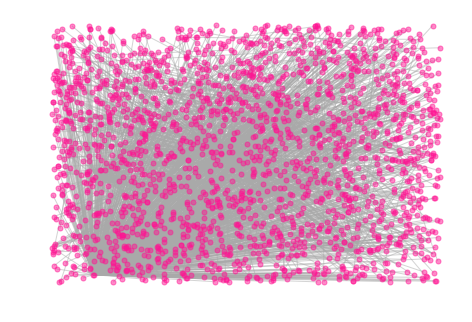

In [23]:
start = time.time()      
G = nx.Graph()
data = open('download_time.txt')
node1 = []
node2 = []

for line in data:
    data_num = line.split(' ')
    value = float(data_num[2].split('\n')[0])
    G.add_node(data_num[0])
    node1.append(data_num[0])  
    G.add_node(data_num[1])
    node2.append(data_num[1])  
    G.add_weighted_edges_from([(data_num[0],data_num[1],value)])
data.close()


nx.draw(G,pos = nx.random_layout(G),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()


#plt.savefig('down_allfig.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明



In [24]:
nx.write_gexf(G ,"Download_Binary_network.gexf") 

## Full projection

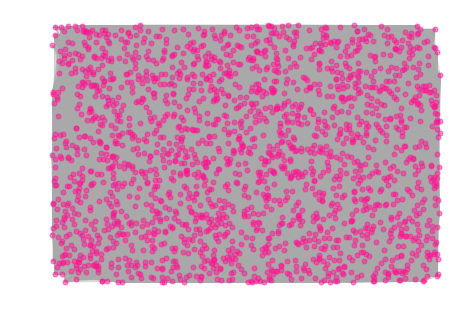

In [25]:
nodes = G.node()  

un_weight_G = nx.project(G,nodes)   

nx.draw(un_weight_G,pos = nx.random_layout(un_weight_G),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()

#plt.savefig('down_unweight_fig.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

un_weight_degree = nx.degree(un_weight_G)              #degree
un_weight_part = community.best_partition(un_weight_G) 
un_weight_clus = nx.clustering(un_weight_G)            
un_weight_cent = nx.degree_centrality(un_weight_G)     #Compute the degree centrality for nodes.

In [26]:
nx.write_gexf(un_weight_G ,"all_download_projection_network.gexf") 

## IP one node projection

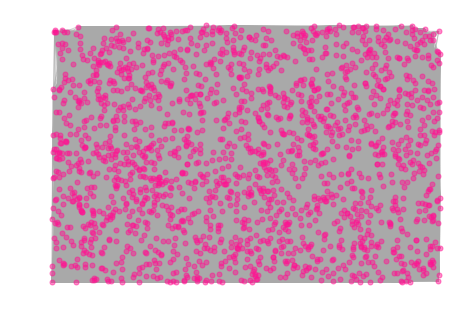

In [27]:
orin_data = open('train_day_71.csv')  #打开原始csv
un_processed_data = open('download_unweighted_count.csv','w')  #写入文件
for line1 in orin_data:
    un_orin_num = line1.split(',')
    un_proce_num = un_orin_num[0:11]
    un_proce_num.append(un_orin_num[11].split('\n')[0])
    
    if un_proce_num[7]=='1':
        if un_proce_num[0] in un_weight_part:
            un_proce_num.append(str(un_weight_degree[un_proce_num[0]]))
            un_proce_num.append(str(un_weight_part[un_proce_num[0]]))
            un_proce_num.append(str(un_weight_cent[un_proce_num[0]]))

            for k in un_proce_num:
                un_processed_data.write(str(k)+',')  #数据写入csv文件中
            un_processed_data.write('\n')
        
    
un_processed_data.close()
orin_data.close()


weight_ip = nx.project(G,node1)       #向ip节点投影
nx.draw(weight_ip,pos = nx.random_layout(weight_ip),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()
#保存图片至文件夹中
#plt.savefig('down_weight_ip.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

weight_degree_ip = nx.degree(weight_ip)              #degree
weight_part_ip = community.best_partition(weight_ip) #图划分,社区划分
weight_clus_ip = nx.clustering(weight_ip)            #节点聚类
weight_cent_ip = nx.degree_centrality(weight_ip)     #Compute the degree centrality for nodes.

In [28]:
nx.write_gexf(weight_ip ,"ip_download_projection_network.gexf") 

## app one node projection

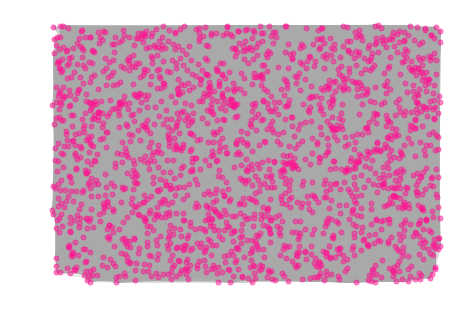

In [30]:
orin_data_ip = open('train_day_71.csv')  #打开原始csv
processed_data_ip = open('download_weighted_count_ip.csv','w')  #写入文件
for line2_ip in orin_data_ip:
    orin_num_ip = line2_ip.split(',')
    proce_num_ip = orin_num_ip[0:11]
    proce_num_ip.append(orin_num_ip[11].split('\n')[0])
    
    if proce_num_ip[7]=='1':
        if proce_num_ip[0] in weight_part_ip:
            proce_num_ip.append(str(weight_degree_ip[proce_num_ip[0]]))
            proce_num_ip.append(str(weight_part_ip[proce_num_ip[0]]))
            proce_num_ip.append(str(weight_cent_ip[proce_num_ip[0]]))
        
            for k1 in proce_num_ip:
                processed_data_ip.write(str(k1)+',')  #数据写入csv文件中
            processed_data_ip.write('\n')
        
processed_data_ip.close()
orin_data_ip.close()


weight_app = nx.project(G,node1)       #向app节点投影
nx.draw(weight_app,pos = nx.random_layout(weight_app),
        node_color = 'deeppink',edge_color = 'darkgray',
        style='solid',alpha=0.5,
        with_labels = False,font_size =12,
        node_size =25, cmap=plt.cm.Reds_r)
plt.show()
#保存图片至文件夹中
#plt.savefig('down_weight_app.jpg', format='jpg', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

weight_degree_app = nx.degree(weight_app)              #degree
weight_part_app = community.best_partition(weight_app) #图划分,社区划分
weight_clus_app = nx.clustering(weight_app)            #节点聚类
weight_cent_app = nx.degree_centrality(weight_app)     #Compute the degree centrality for nodes.

In [31]:
nx.write_gexf(weight_app ,"app_download_projection_network.gexf") 

In [32]:
orin_data_app = open('train_day_71.csv')  #打开原始csv
processed_data_app = open('download_weighted_count_app.csv','w')  #写入文件
for line2 in orin_data_app:
    orin_num_app = line2.split(',')
    proce_num_app = orin_num_app[0:11]
    proce_num_app.append(orin_num_app[11].split('\n')[0])
    
    if proce_num_app[7]=='1':
        if proce_num_app[0] in weight_part_app:
            proce_num_app.append(str(weight_degree_app[proce_num_app[0]]))
            proce_num_app.append(str(weight_part_app[proce_num_app[0]]))
            proce_num_app.append(str(weight_cent_app[proce_num_app[0]]))
        
            for k1 in proce_num_app:
                processed_data_app.write(str(k1)+',')  #数据写入csv文件中
            processed_data_app.write('\n')
        
processed_data_app.close()
orin_data_app.close()


end = time.time()   #程序结束时间
print('the code is processed, using time : %fs.' %(end-start))
 


the code is processed, using time : 456.826487s.
